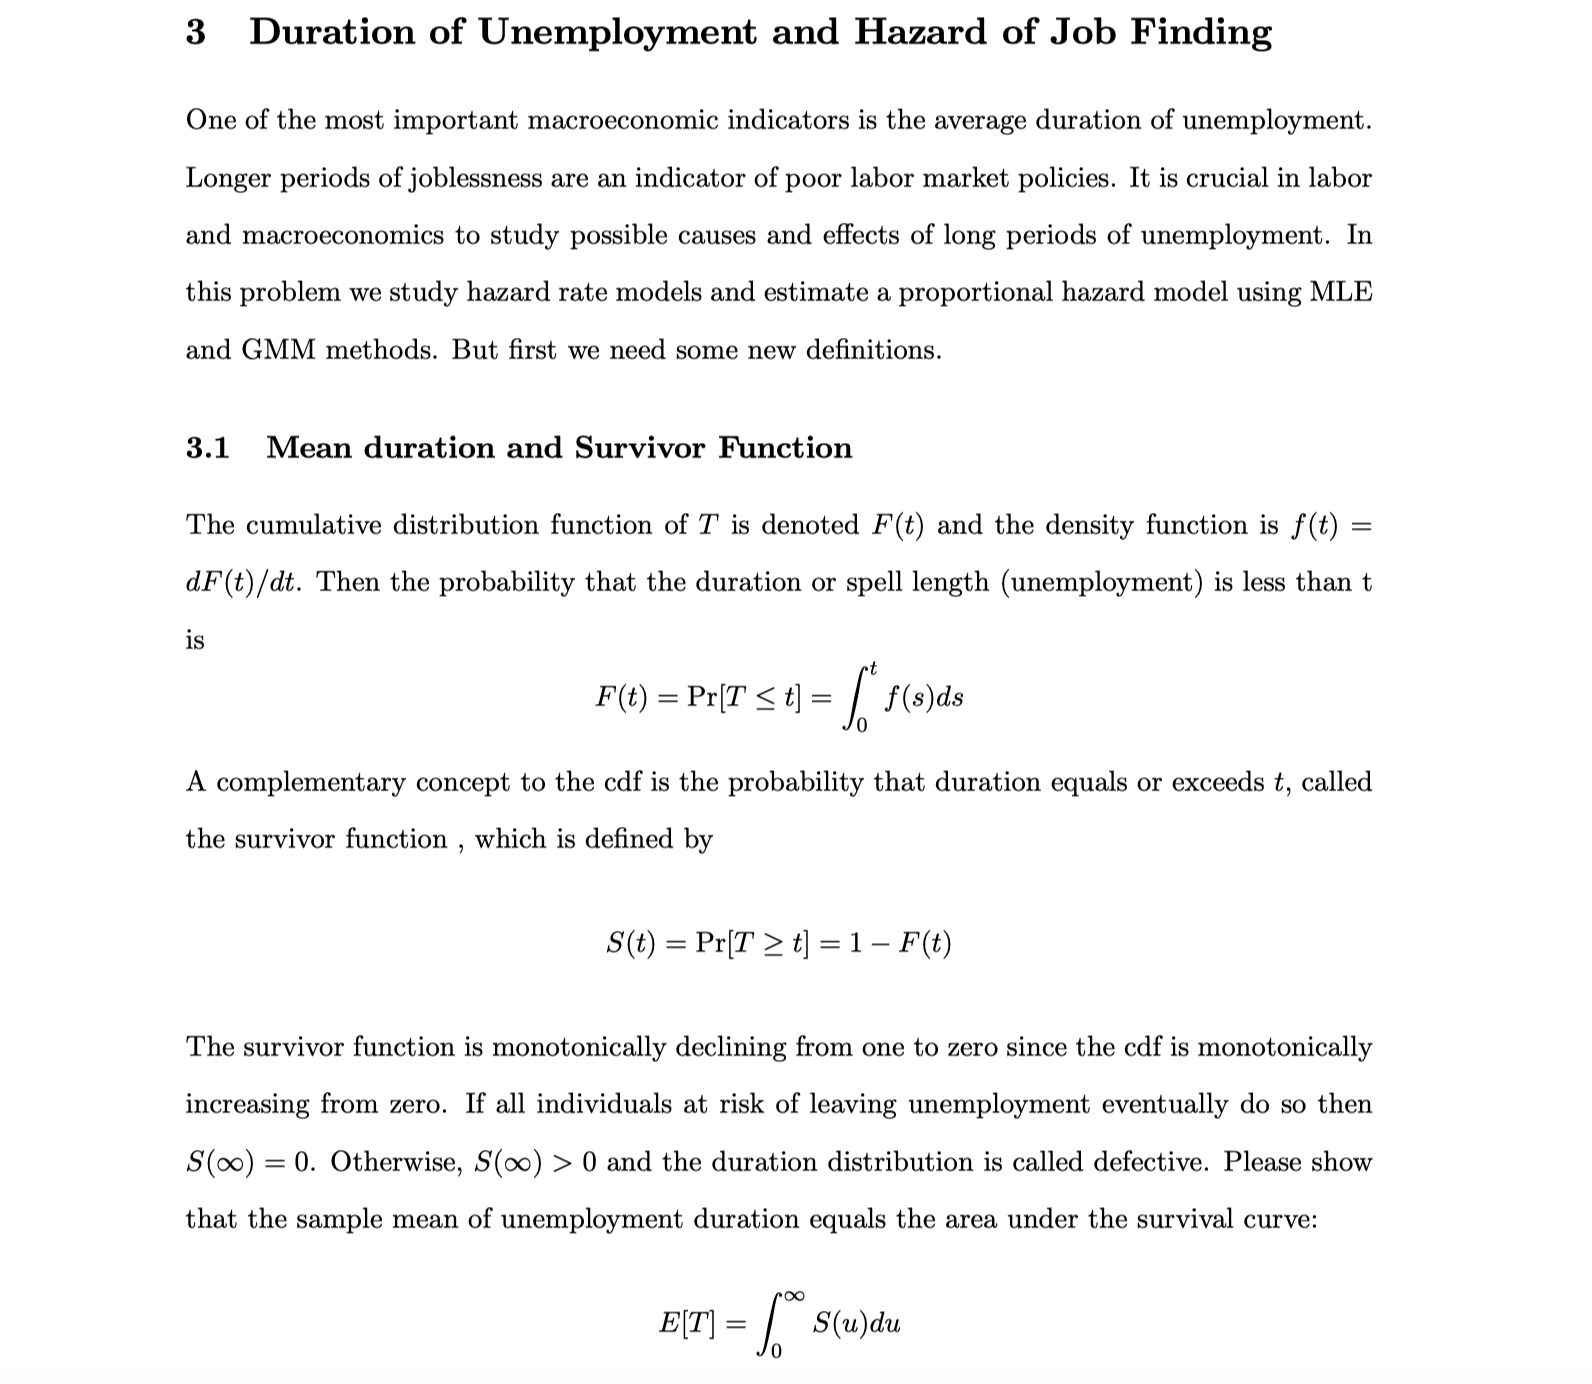

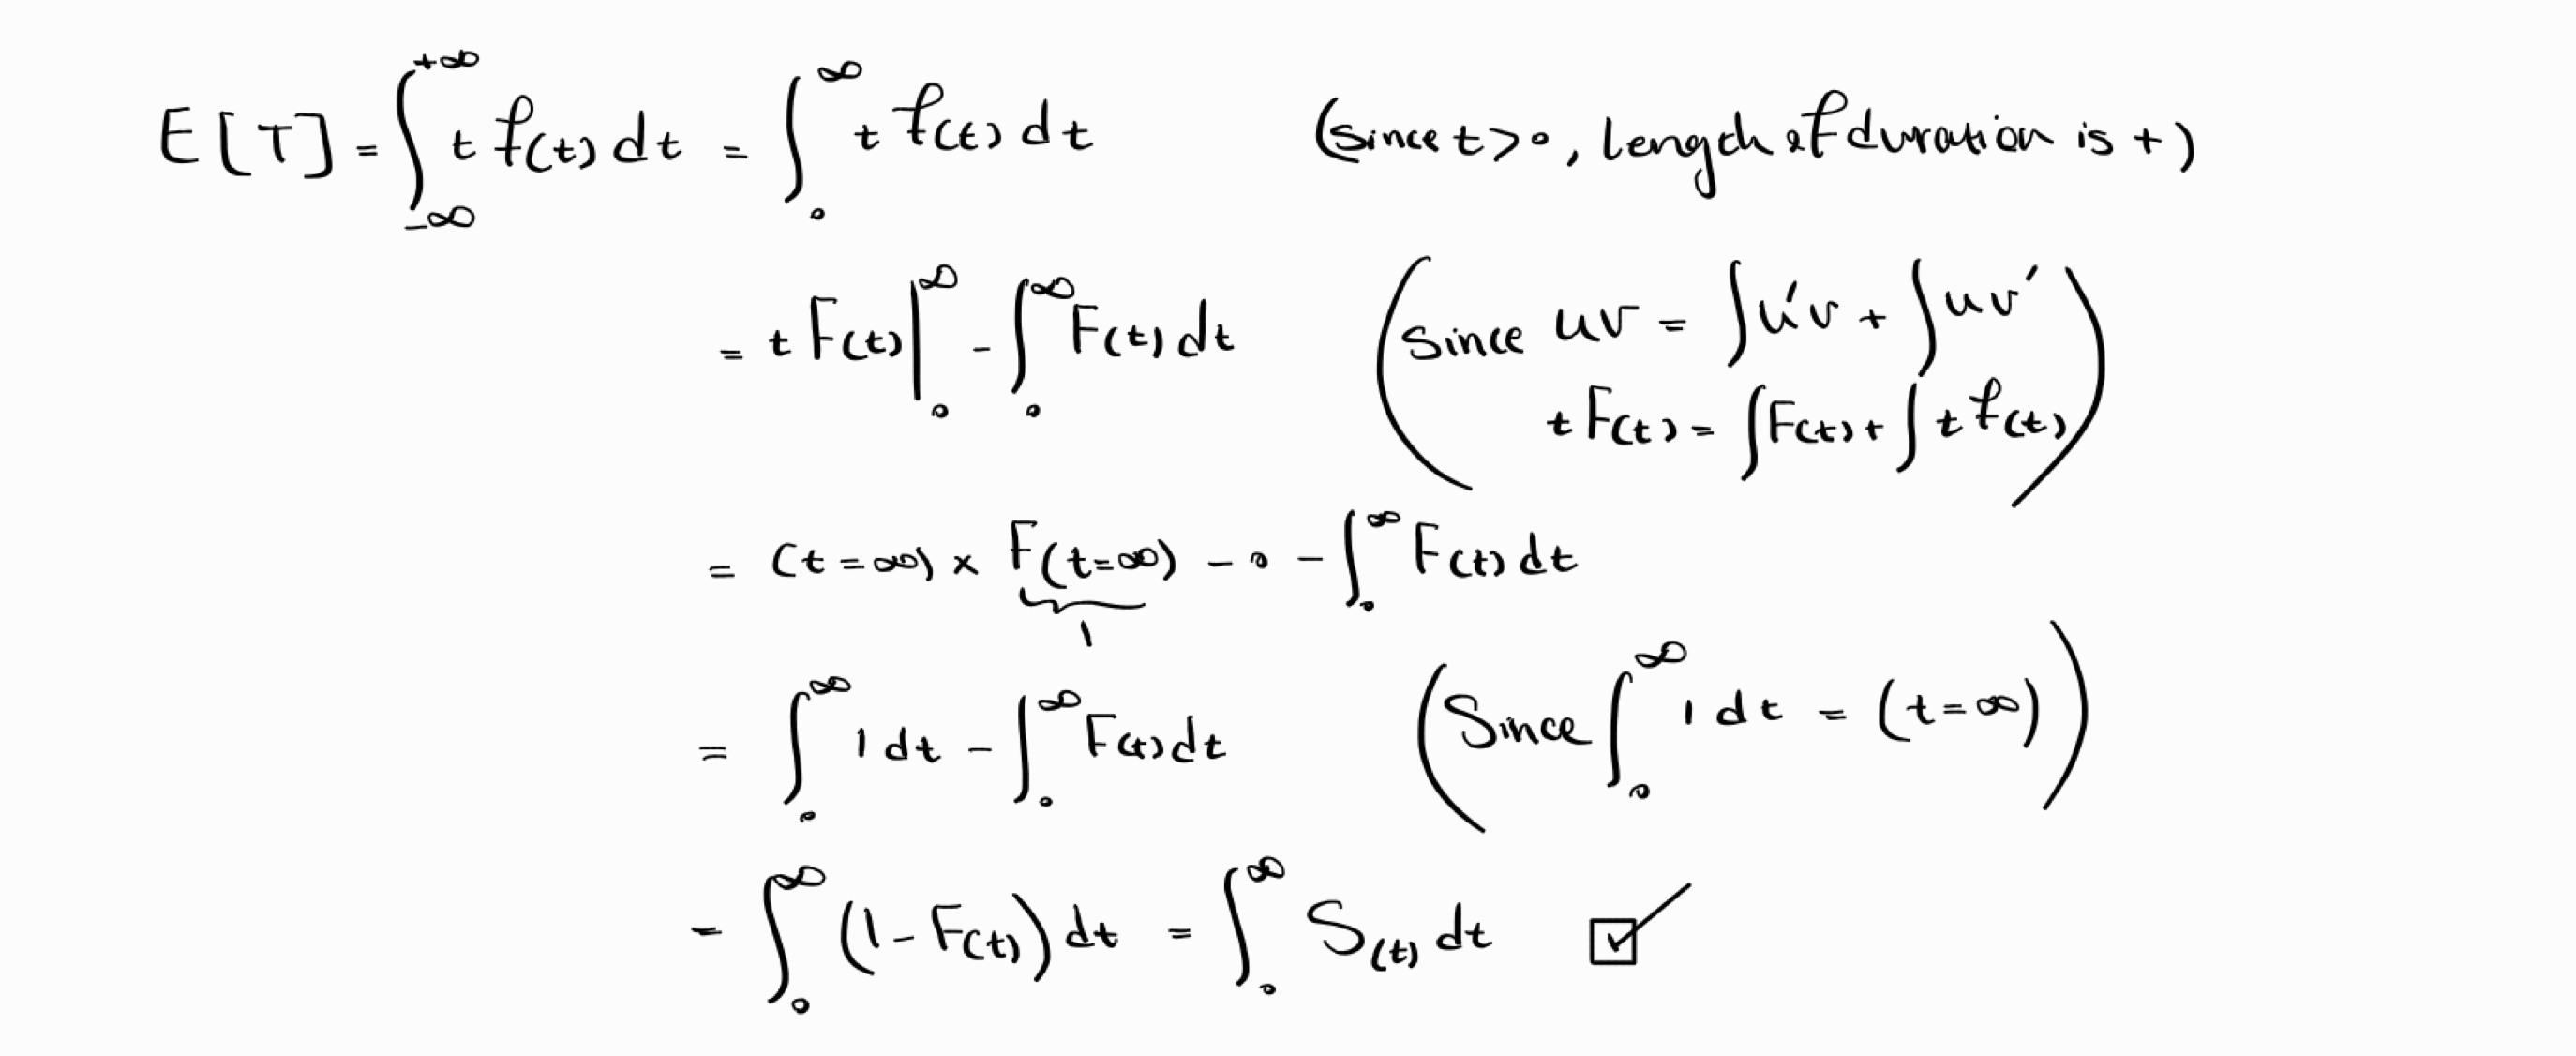

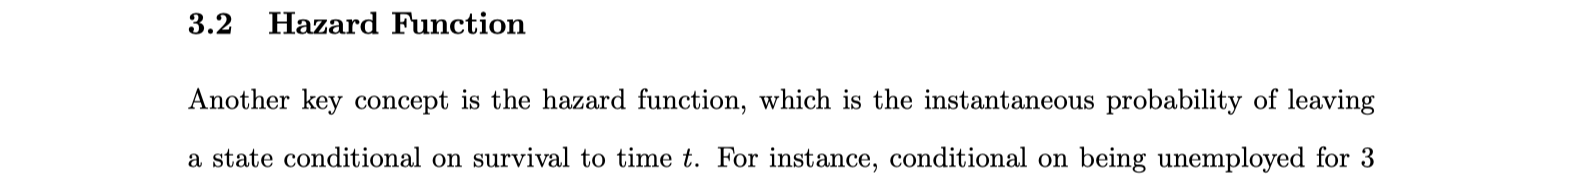
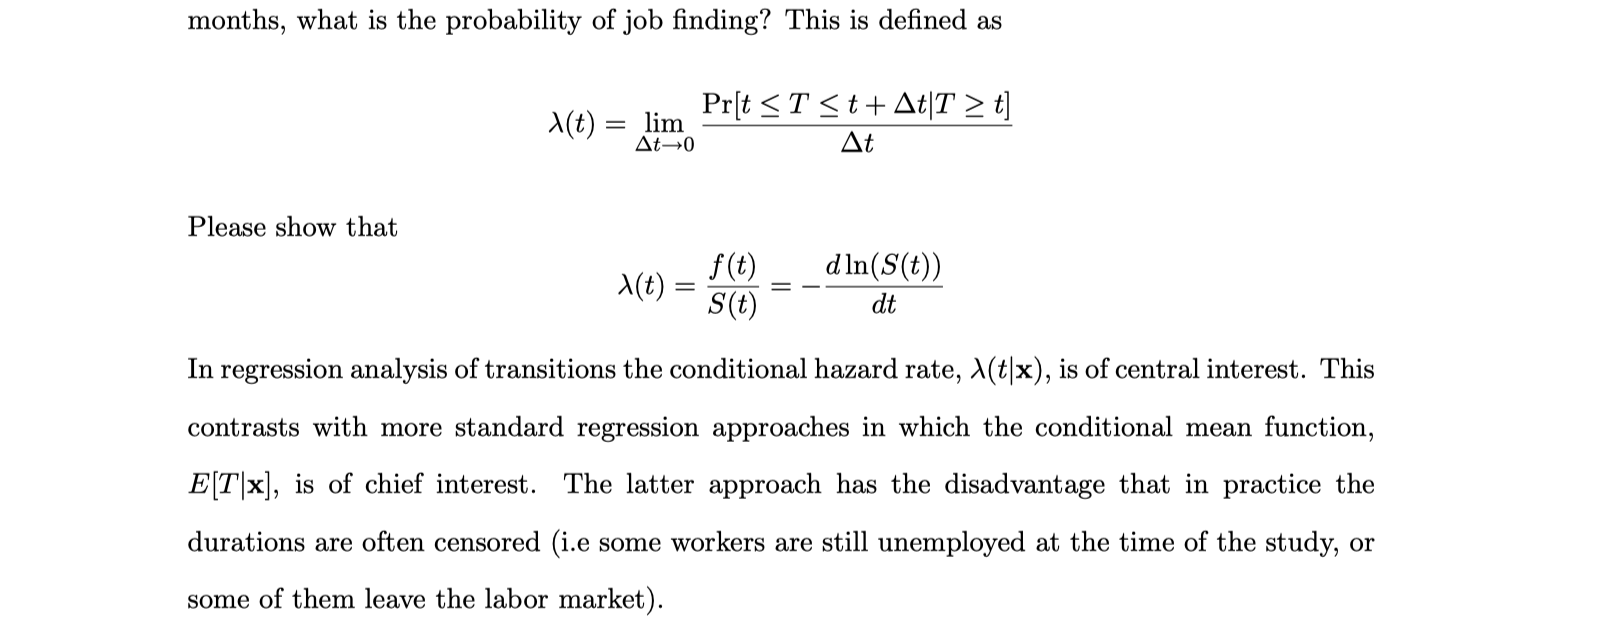

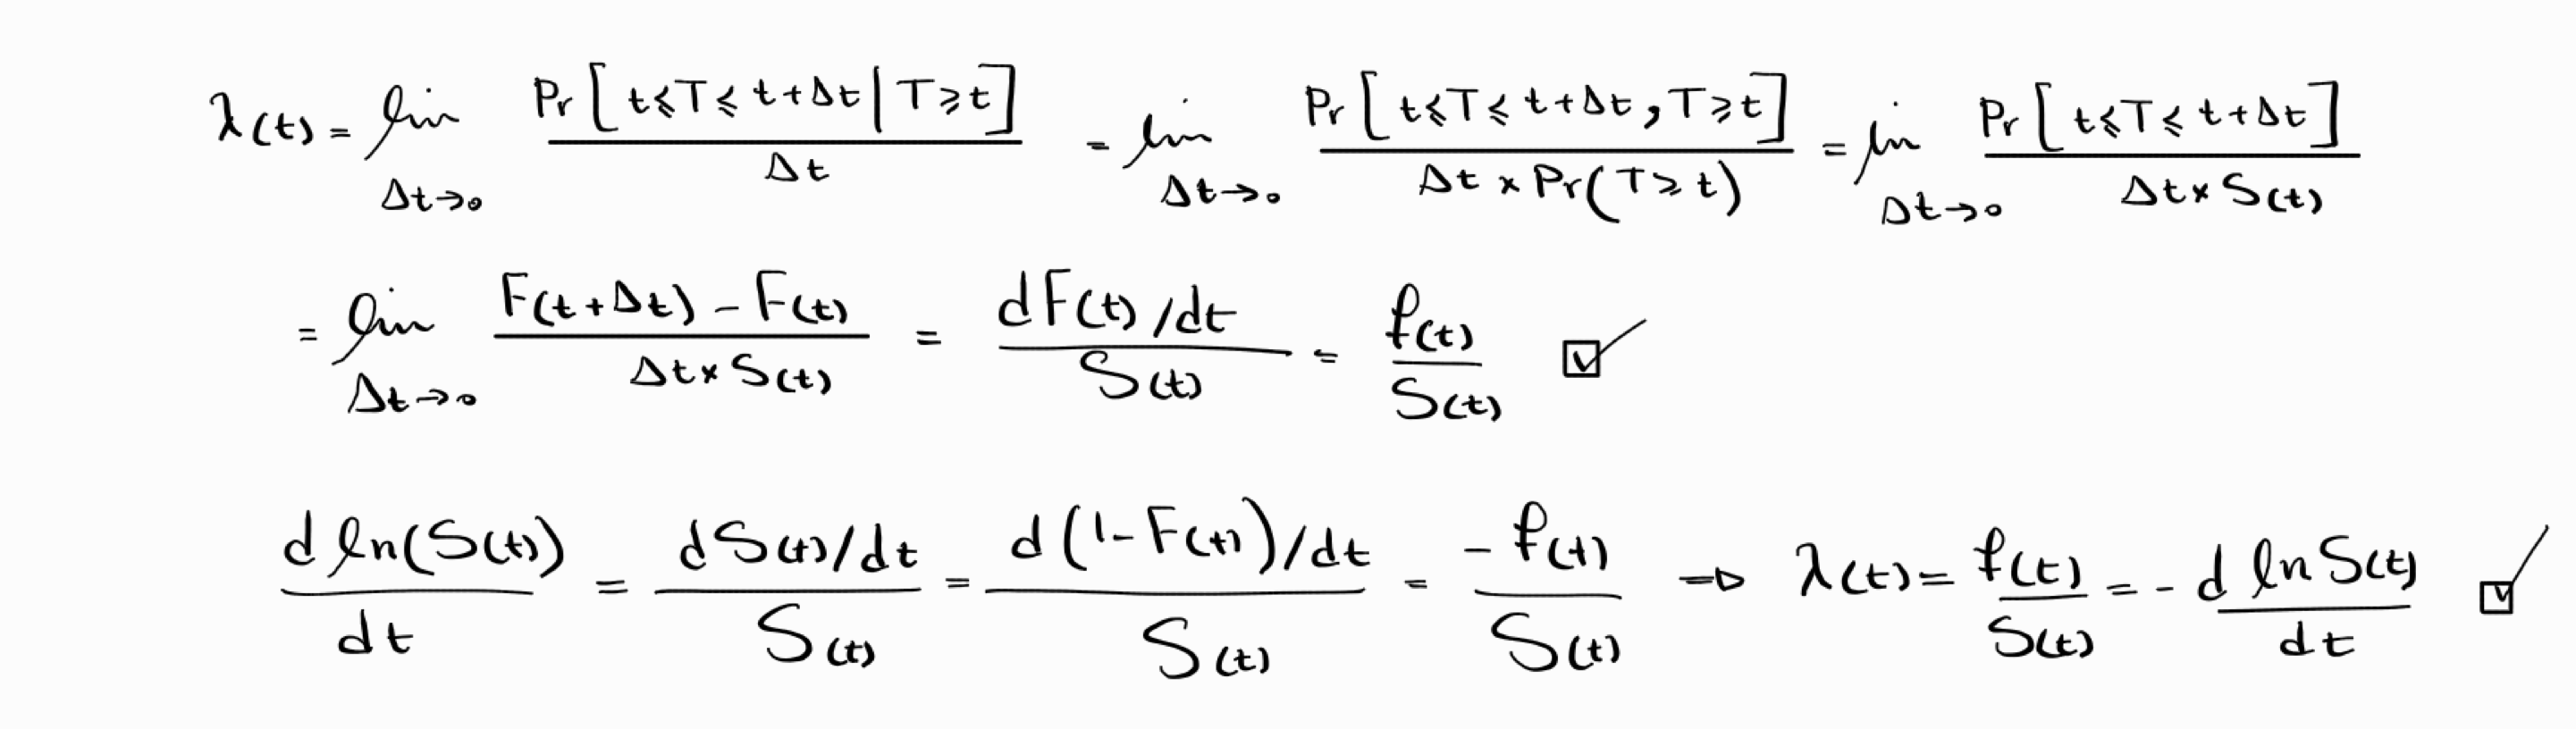

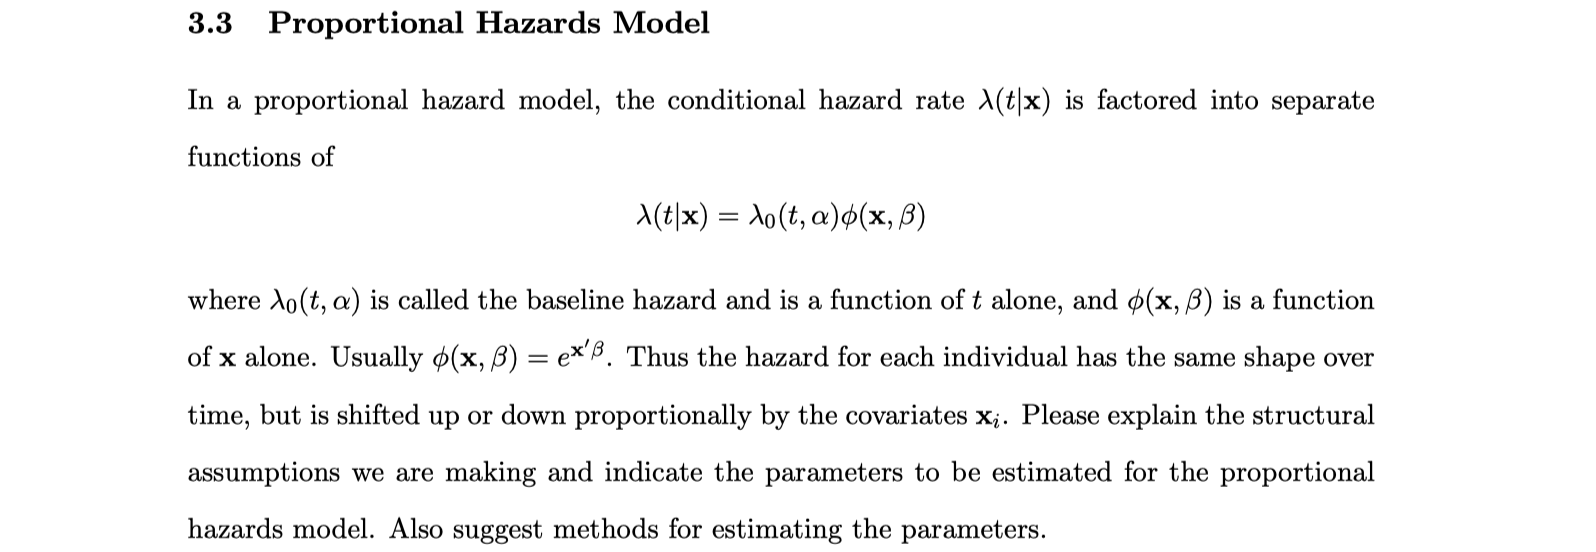

The structural assumption within the proportional hazards model is that the separation of the hazard function into a baseline hazard and a function of x assumes that individuals have hazard rates that are proportional over time. This structural assumption may not accurately reflect reality. For instance, for an individual 'A' who is particularly skilled at finding jobs, the shape of the hazard function over time could be different from another individual 'B' who does not share the same talent. In essence, the hazard shape over time could also be dependent on each individual's characteristics, $x$. However, the division into two separate functions constrains this by assuming a constant shape, only adjusted up or down by the covariates. This reflects the core structural assumption that while individual experiences may vary, the ratio of the hazards for any two individuals is constant over time.

Parameters to be estimated are $\alpha$ and $\beta$.

If a parametric form of the baseline hazard is assumed (e.g., Weibull, exponential), both the baseline hazard parameters $\alpha$ and the risk coefficients $\beta$ can be estimated using MLE. Moreover, moment conditions could be derived from the hazard function or the survival function which could be used in GMM estimation.

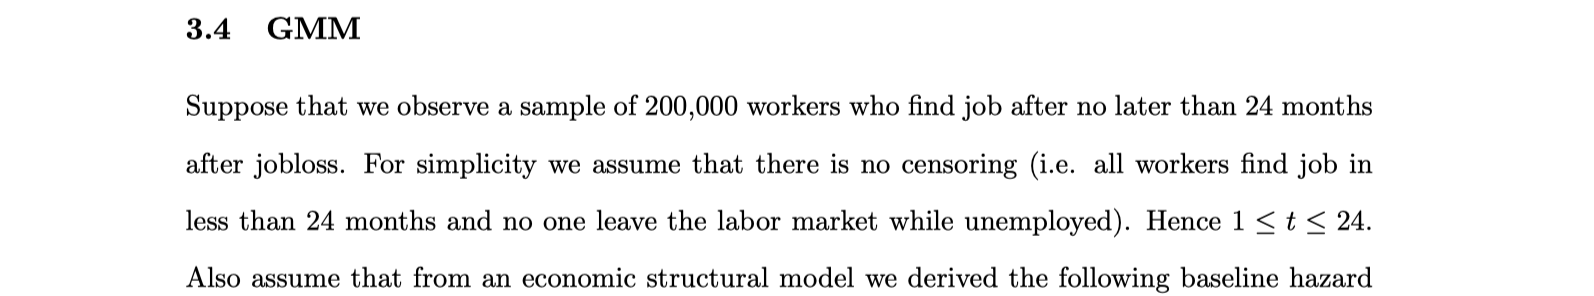
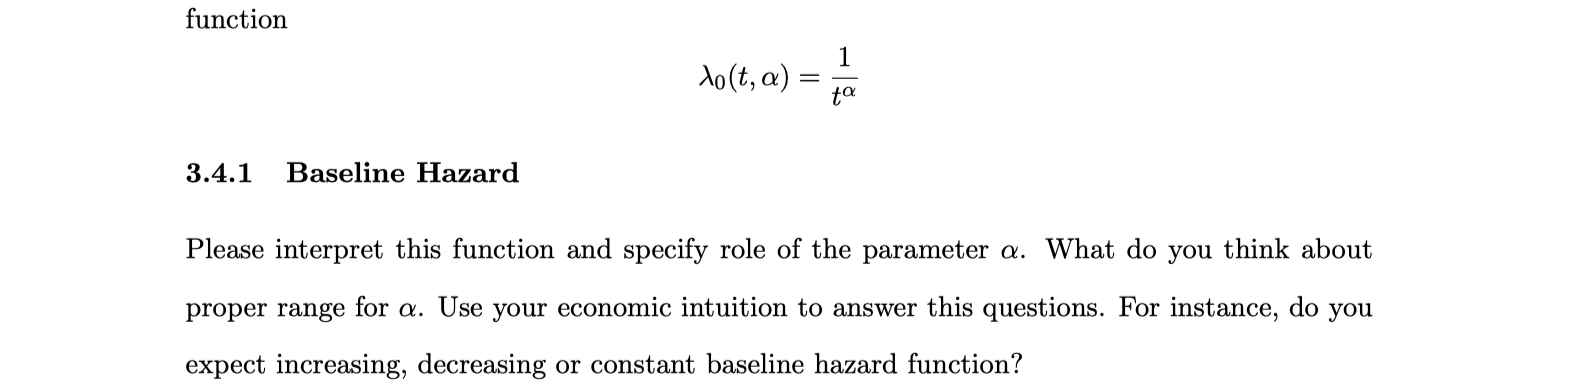

The baseline hazard function encapsulates the relationship between the time a person has been unemployed and the probability of finding a job, which may be constant, increasing, or decreasing, depending on the value of $\alpha$.

If $\alpha$ is negative, the probability of finding a job increases over time. If $\alpha$ is zero, the probability of finding a job remains constant regardless of the unemployment duration. If $\alpha$ is positive, the probability of finding a job decreases as time goes on. As $\alpha$ becomes larger, the probability decreases more rapidly, indicating that the likelihood of finding employment, given that one has been unemployed up to time t, lessens as $\alpha$ increases.

The probability may increase over time if workers lower their employment standards or if they intensify their job search the longer they are unemployed. Moreover, consider that immediately after becoming unemployed, an individual is unlikely to find a job the next day, as it typically takes time to search for and secure employment.  On the other hand, the probability may decrease if workers' skills deteriorate over time or if employers negatively perceive long-term unemployment. Considering the dynamics of the job market, my opinion leans towards the overall effect being such that the probability of finding a job increases over time. This suggests that the parameter $\alpha$ would indeed be negative.

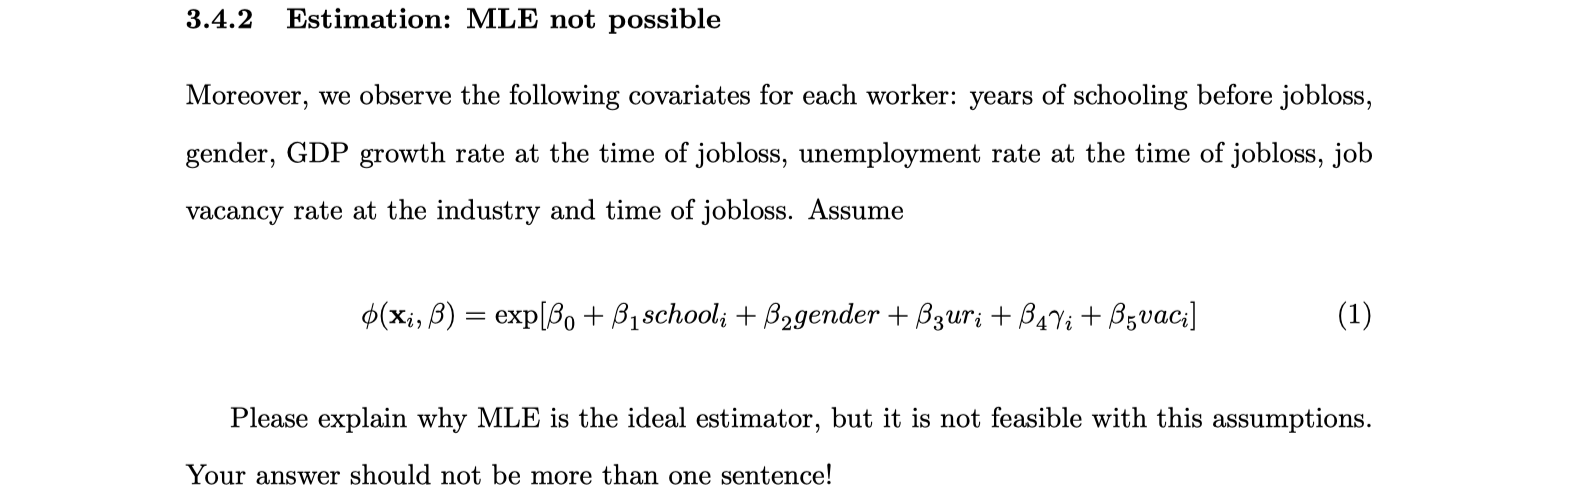

MLE is the ideal estimator due to its efficiency and consistency, but it is not feasible here because we don't know the distribution function.

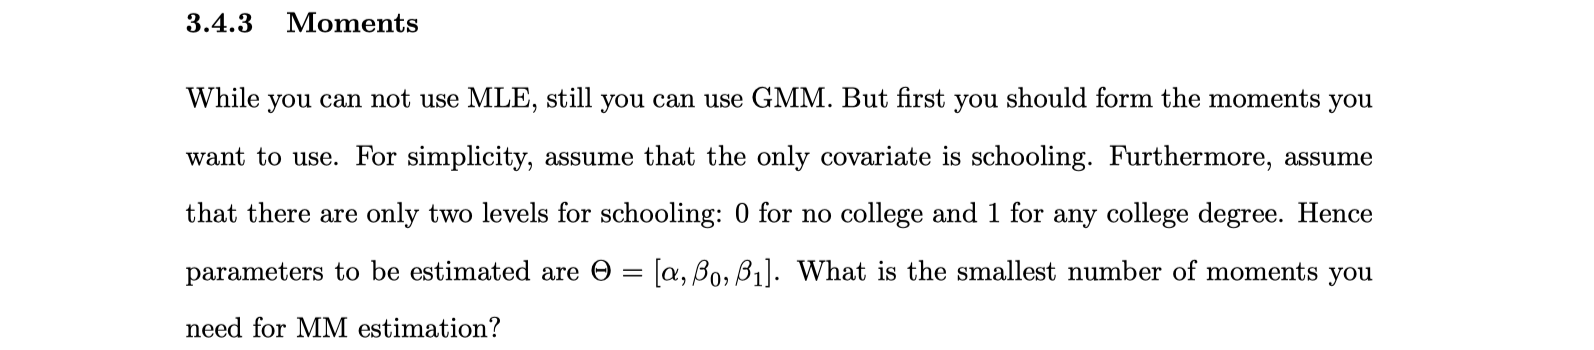

In order to identify the parameters, we need at least as many moments as the number of parameters to estimate. Since we have three parameters in our model, we require a minimum of three moments to identify the parameters. 

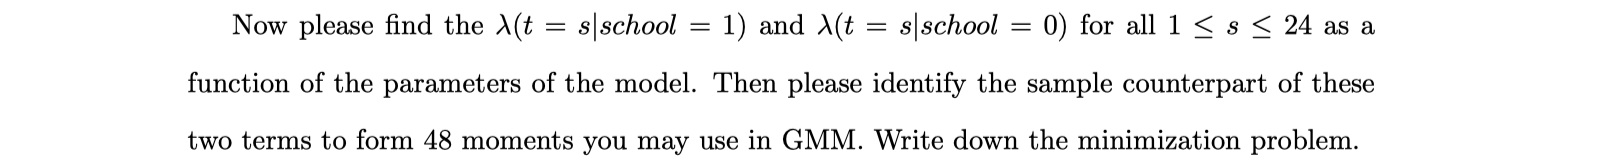

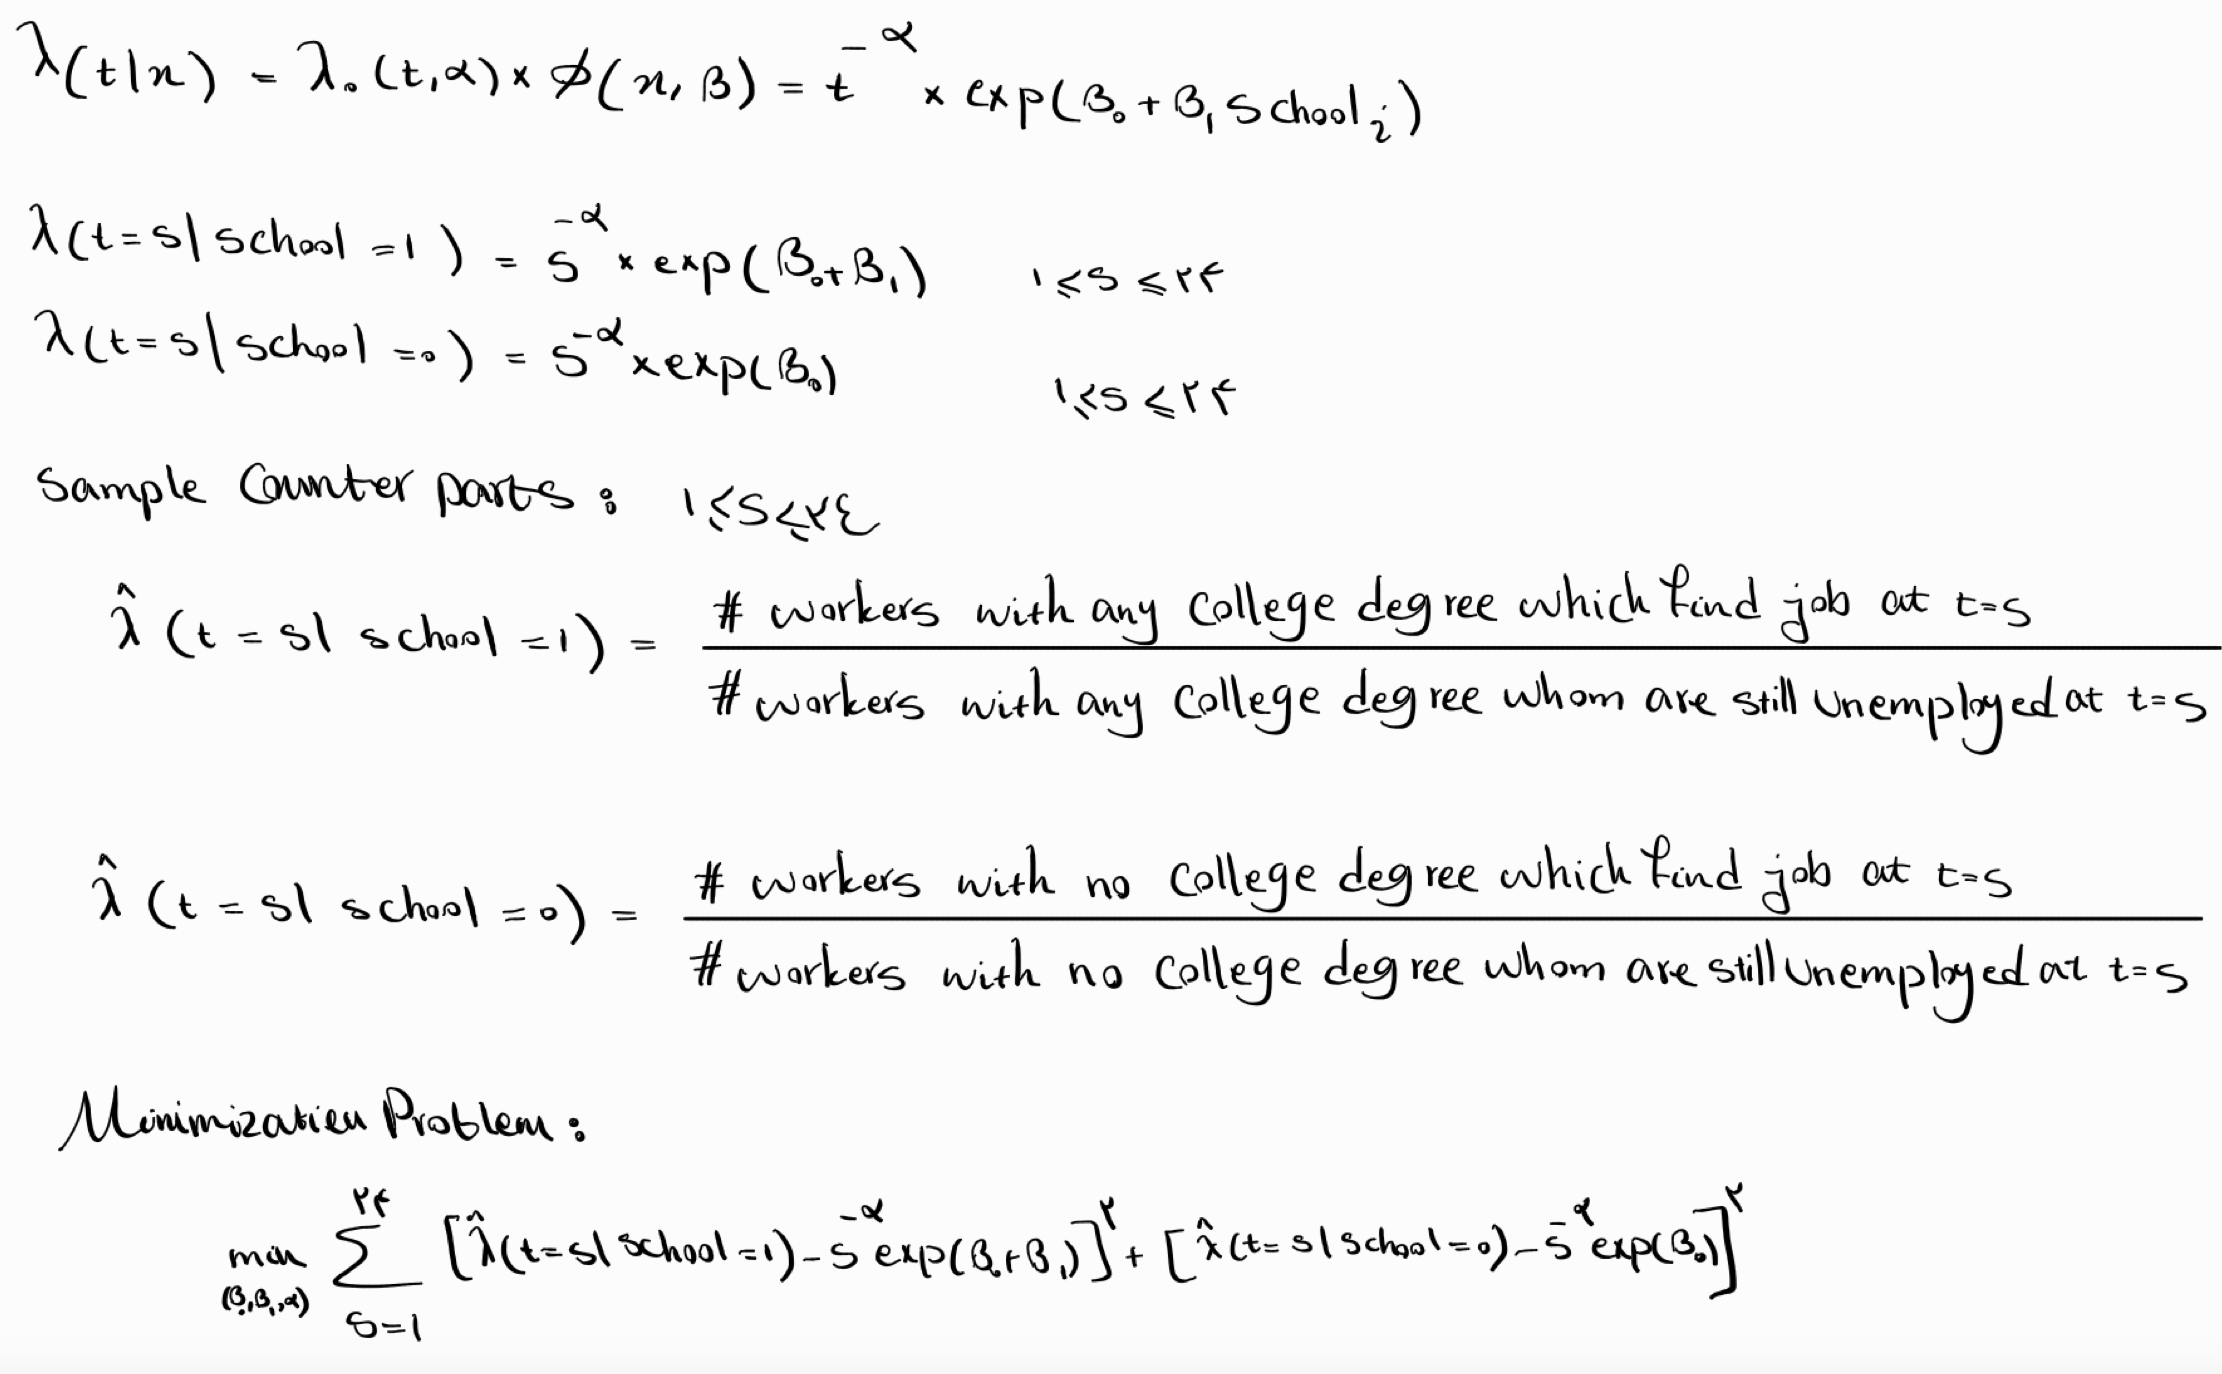

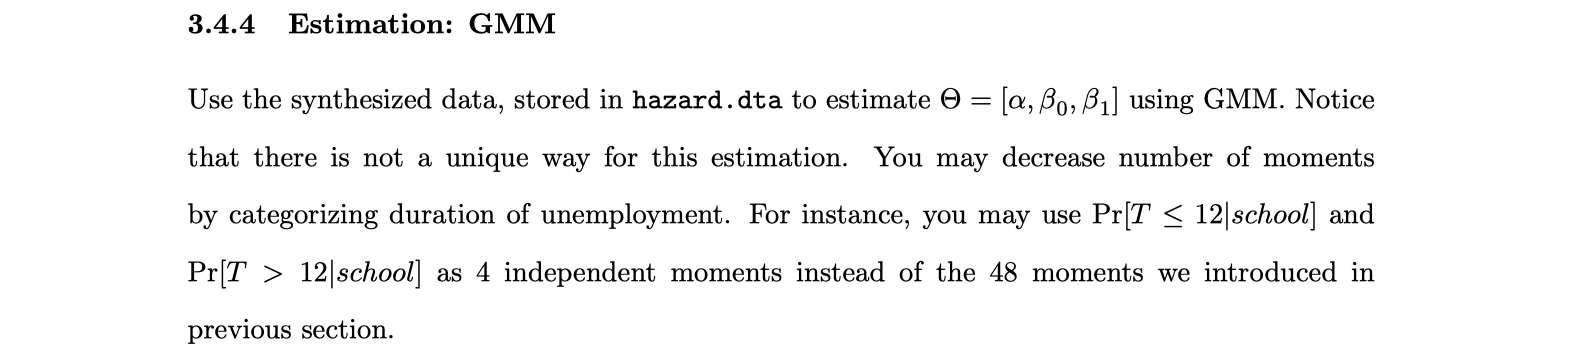

In [60]:
import pandas as pd
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

In [6]:
data = pd.read_csv('Q3_Data/hazard.csv')

In [41]:
s = np.arange(1, 25).astype(float)
sample_counterparts = np.concatenate(((data[data['college']==0]['duration'].values[:, None] == s).sum(axis=0)/\
    (data[data['college']==0]['duration'].values[:, None] >= s).sum(axis=0),
                                               ((data[data['college']==1]['duration'].values[:, None] == s).sum(axis=0)/\
    (data[data['college']==1]['duration'].values[:, None] >= s).sum(axis=0))))

In [54]:
def g(theta):
    alpha, beta0, beta1 = theta
    return np.concatenate((s**(-alpha)*np.exp(beta0), s**(-alpha)*np.exp(beta0+beta1))) - sample_counterparts

def objective_func_gmm(theta, W):
    g_hat_n = g(theta)
    q = g_hat_n @ W @ g_hat_n.T
    return q

theta0 = np.array([-2,-2,-2])
W = np.identity(48)
result = minimize(objective_func_gmm, theta0, args=(W), method='Nelder-Mead')
results_gmm = pd.DataFrame({'theta': result.x}, index=['alpha', 'beta0', 'beta1'])
results_gmm

,theta
alpha,-6.471617
beta0,-20.741900
beta1,-0.001328


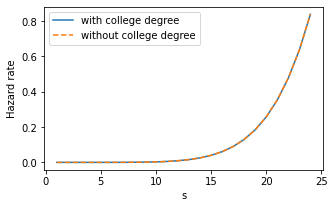

In [69]:
s = np.arange(1, 25)
alpha, beta0, beta1 = results_gmm['theta']
plt.figure(figsize=(5, 3))
plt.plot(s, s**(-alpha) * np.exp(beta0 + beta1), label='with college degree')
plt.plot(s, s**(-alpha) * np.exp(beta0), linestyle='--', label='without college degree')
plt.xlabel('s')
plt.ylabel('Hazard rate')
plt.legend()
plt.show()

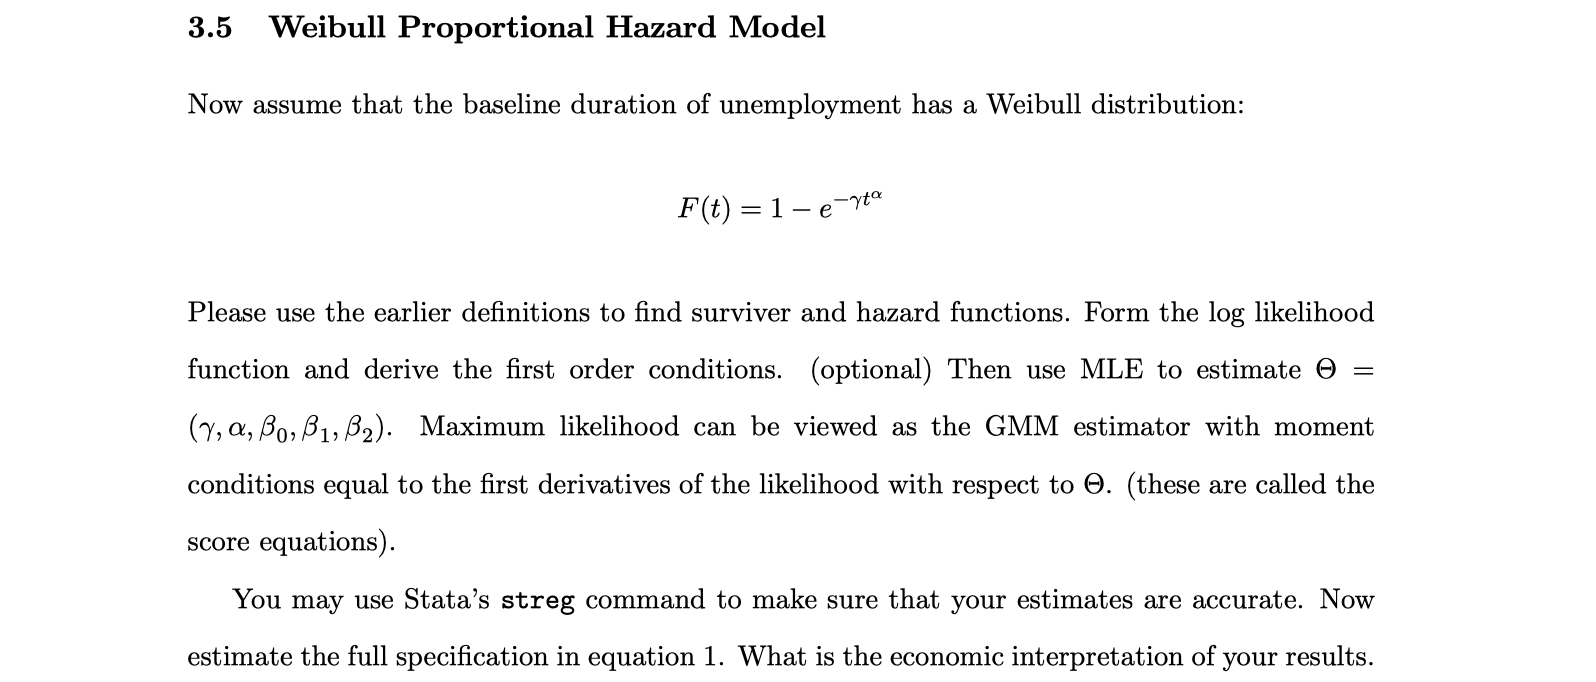

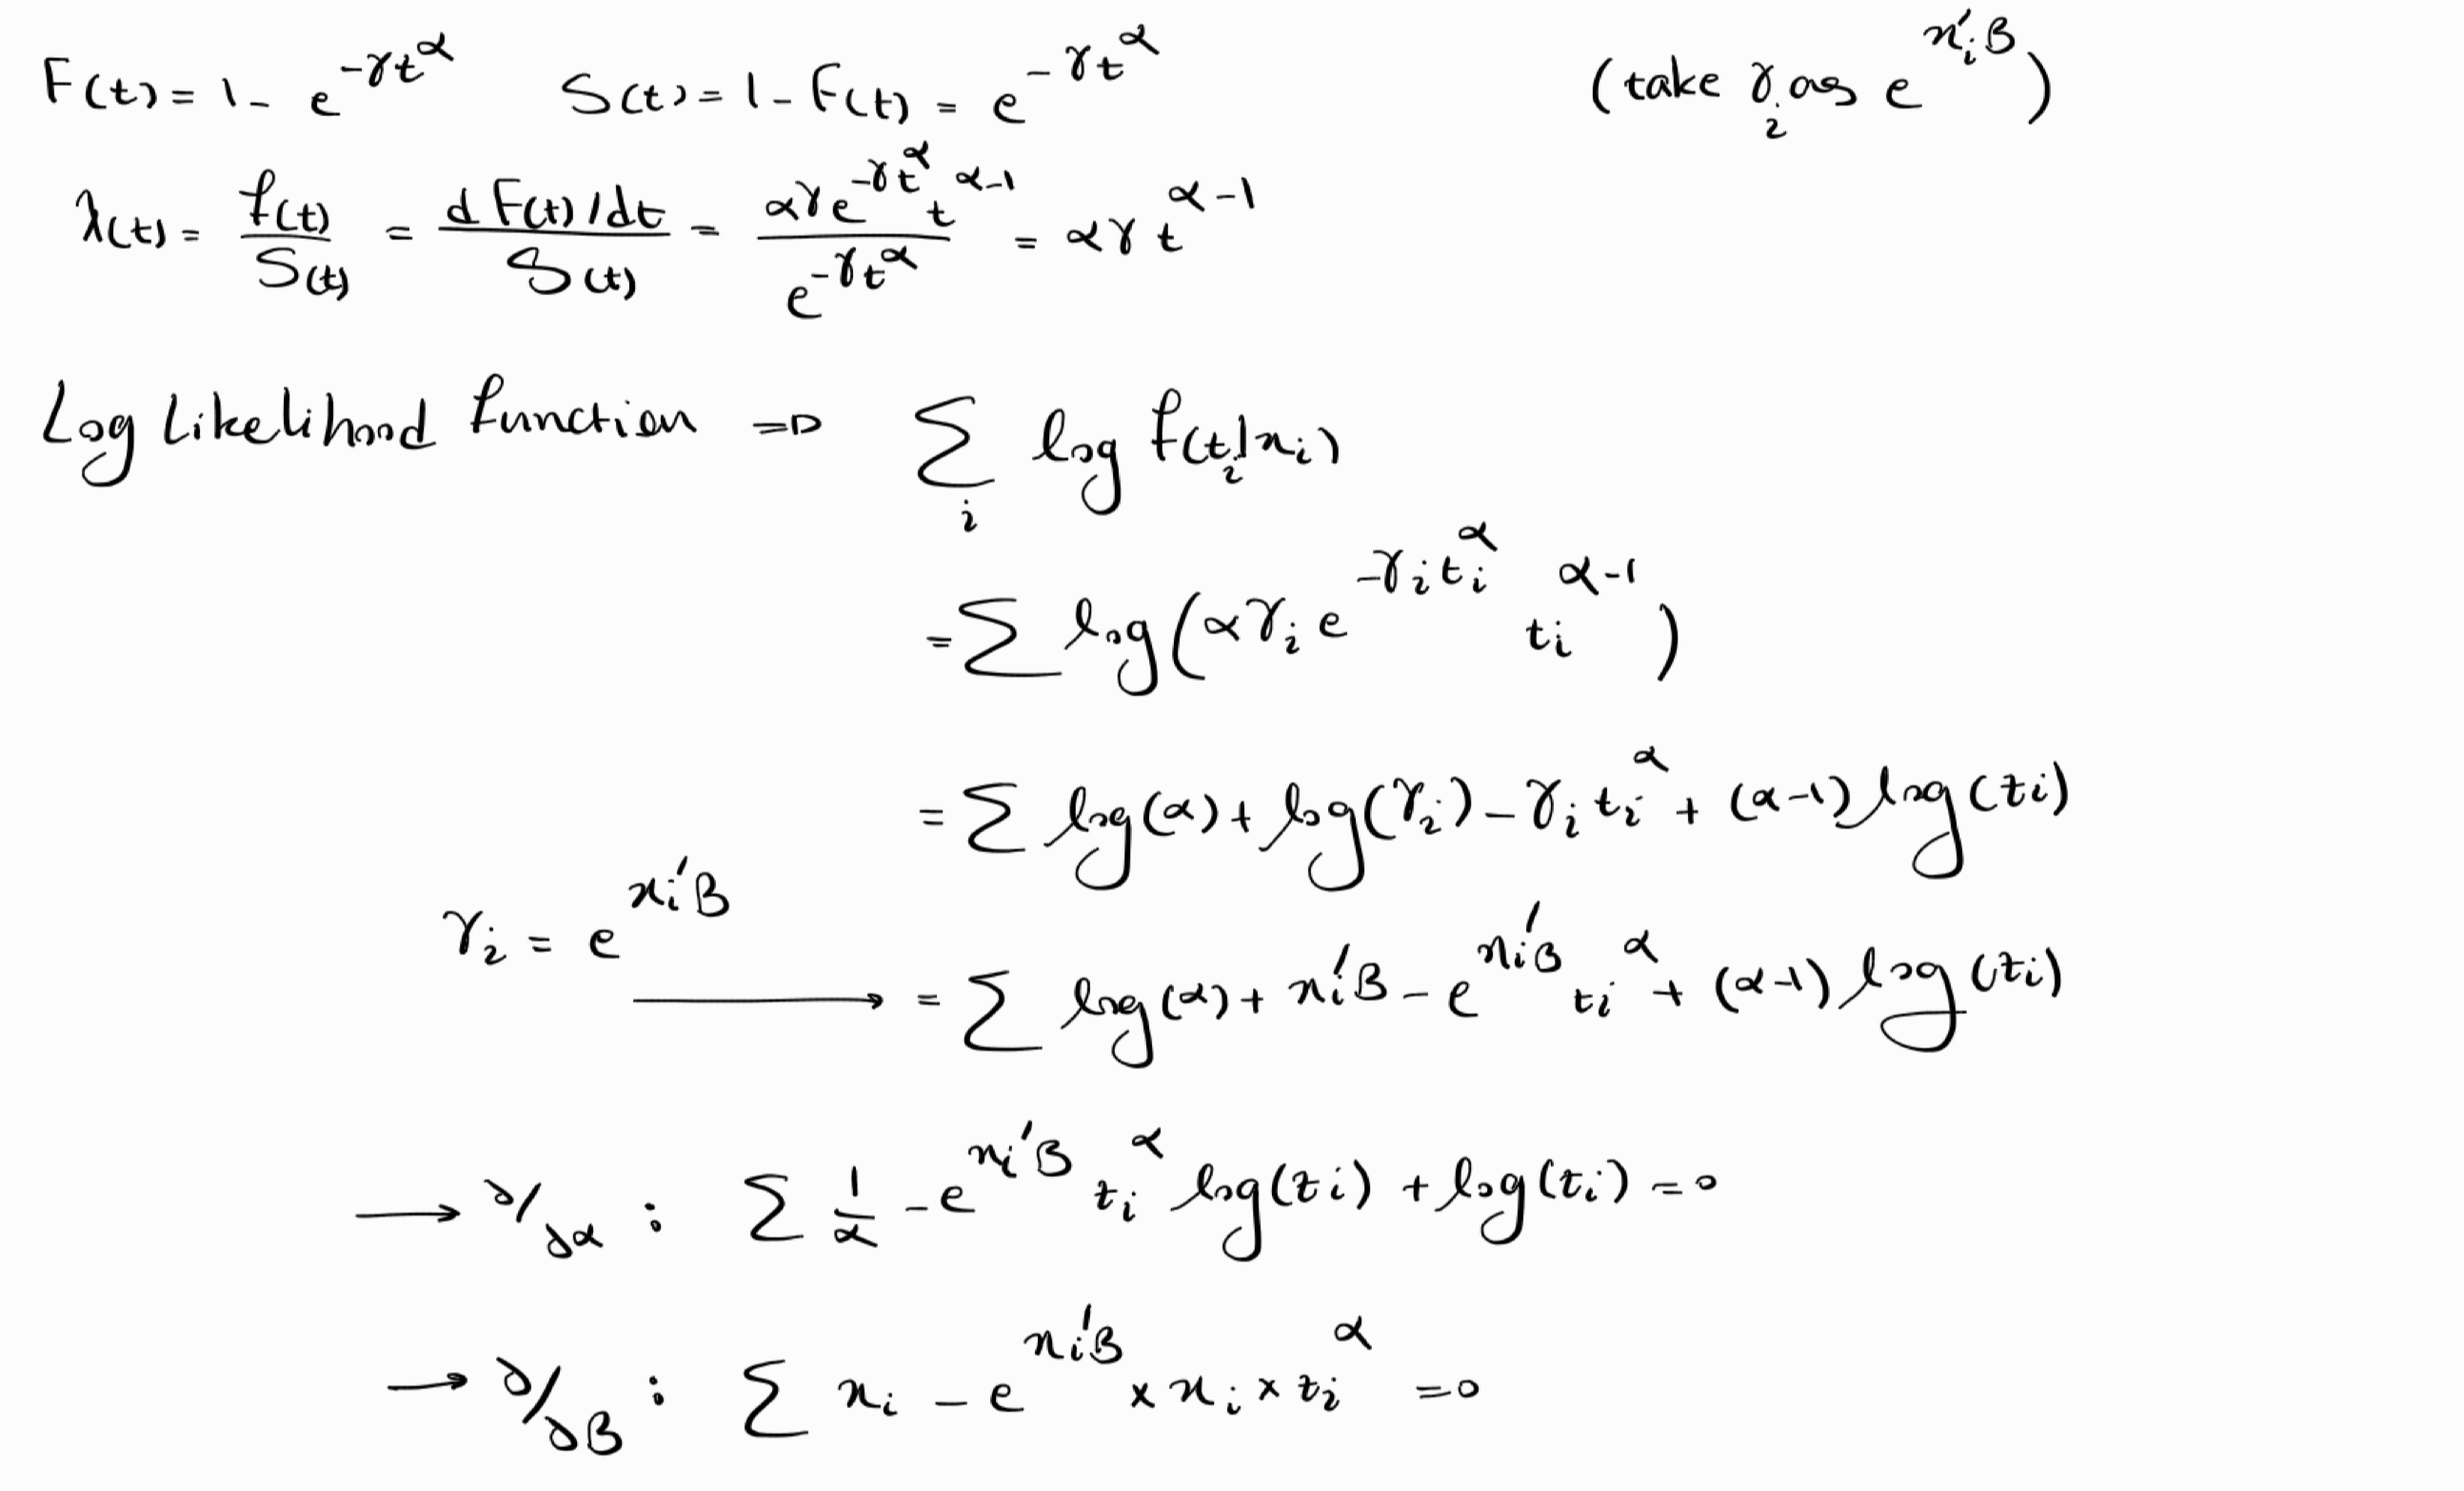